# Функции и библиотеки

In [1]:
from graphlib.structures import Graph
from graphlib.algorithms import DFS_with_cc, BFS_search
from graphlib.tools import radius_approximate, diameter_approximate, density, geodesic_percentile_approximate

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных, количество ребер и вершин; плотность

In [2]:
%%time

G = Graph('CO-Astro')
with open('./datasets/CA-AstroPh.txt', mode='r') as f:
    for line in f:
        u, v = line.split()
        G.add_edge(u, v)
print(G)

print('Плотность графа: ', density(G))

Граф <CO-Astro> с 18772 вершинами and 198110 ребрами
Плотность графа:  1.0095452503419835e-05
Wall time: 511 ms


# Количество компонент связности, характеристики наибольшей компоненты

In [3]:
%%time

number, largest_index, components = DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Наибольшая компонента связности: 17903 вершин и 197031 ребер
Wall time: 194 ms


In [4]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.954


## Доля вершин в компоненте слабой связности при удалении x% случайных вершин

Wall time: 157 ms


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

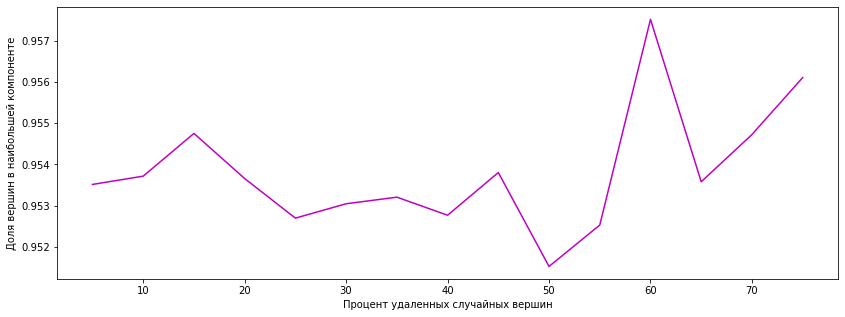

In [5]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 5))
plt.plot(procent_of_removing, props, 'm')
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в компоненте слабой связности при удалении x% вершин наибольшей степени

Wall time: 209 ms


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

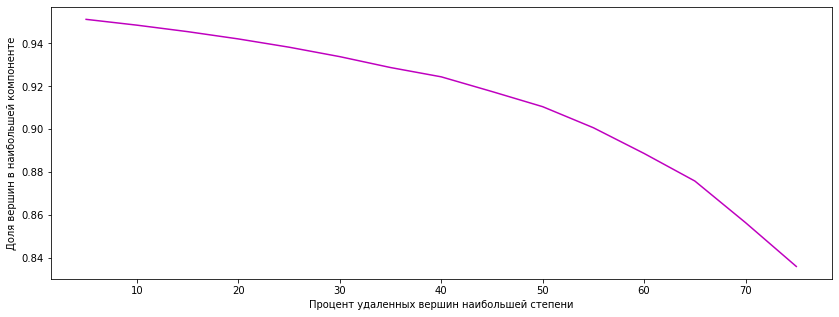

In [6]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 5))
plt.plot(procent_of_removing, props, 'm')
plt.xlabel('Процент удаленных вершин наибольшей степени')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [9]:
%%time

diam = diameter_approximate(graph=largest_component,
                            number=500)
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')

Диаметр наибольшей компоненты (приближенно): 11
Wall time: 1h 27s


In [10]:
%%time

radius = radius_approximate(graph=largest_component,
                            number=500)
print(f'Радиус наибольшей компоненты (приближенно): {radius}')

Радиус наибольшей компоненты (приближенно): 7
Wall time: 1h 55min


In [5]:
%%time

percentile = geodesic_percentile_approximate(graph=largest_component,
                                             number=500,
                                             percent=90)
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): 5
Wall time: 5h 29min 21s


# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)

# Число треугольников, глобальный и кластерный коэффициенты